#  SWMAL Exercise

## Dataanalysis 

### Qa) Description of dataset for O4


We aim to create a model predicting the number of streams a song is likely to receive using a dataset that includes artist information, release details, and audio features. Our goal is to explore how these features influence a song’s popularity and build a regression model for stream prediction.
We want to see if it is possible to se how popular a song will be. If possible, could this be beneficial for the music industry? If you know what will be a hit you could target your marketing strategies, you could optimize automatic playlist creations and therby enhance user experiences and more.
We have chosen a dataset of the most streamed songs in 2023. The list doesn’t only contain songs that are released in the year 2023. The list also contains songs that have been released going back to the 1960’s and thereby provides us with a little broader variety of songs.
“This dataset contains a comprehensive list of the most famous songs of 2023 as listed on Spotify. The dataset offers a wealth of features beyond what is typically available in similar datasets. It provides insights into each song’s attributes, popularity, and presence on various music platforms. The dataset includes information such as track name, artist(s) name, release date, Spotify playlists and charts, streaming statistics, Apple Music presence, Deezer presence, Shazam charts, and various audio features.”
Description of the dataset and the dataset it self was found kaggle.
Source: https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023


### List of features

__Basic Information:__

- track_name: Name of the song
- artist(s)_name: Name of the artist(s) of the song
- artist_count: Number of artists contributing to the song

__Release Information:__

- released_year: Year when the song was released
- released_month: Month when the song was released
- released_day: Day of the month when the song was released

__Platform Presence:__

- in_spotify_playlists: Number of Spotify playlists the song is included in
- in_spotify_charts: Presence and rank of the song on Spotify charts
- in_apple_playlists: Number of Apple Music playlists the song is included in
- in_apple_charts: Presence and rank of the song on Apple Music charts
- in_deezer_playlists: Number of Deezer playlists the song is included in
- in_deezer_charts: Presence and rank of the song on Deezer charts
- in_shazam_charts: Presence and rank of the song on Shazam charts

__Streaming Statistics:__

- streams: Total number of streams on Spotify

__Audio Features:__

- bpm: Beats per minute, a measure of song tempo
- key: Key of the song
- mode: Mode of the song (major or minor)
- danceability_%: Percentage indicating how suitable the song is for dancing
- valence_%: Positivity of the song's musical content
- energy_%: Perceived energy level of the song
- acousticness_%: Amount of acoustic sound in the song
- instrumentalness_%: Amount of instrumental content in the song
- liveness_%: Presence of live performance elements
- speechiness_%: Amount of spoken words in the song

The list above is all the features within the dataset. There are 953 samples. The dataset provides us with an attribute *streams*, which represents the total amount the song has been streamed. This attribute will be used as ground-truth for our model as we will assume that most streams equals to most popular.


We know that there are some factors that we can't take or will not be taken into account and therefor can't be measured.
It's difficult to say wether if a song has been used on a score in a movie, in advertisment, a meme ot some othere thing that has made a song more streamed.
Furthermore we don't know anything about the listeners demographic which might also could give some insight in wether how much a song would be streamed.
There is properbly other things that could influence the number of streams, but we will only be looking at the data within the dataset.

Depending on which values are missing we will decide on what to do. A small peak into the data it revealed that only two columns were missing values. The two columns were *in_shazam_chart* missing 50 values and *key* missing 95 values. We haven't decided on what to yet. It kind of depens on what influence it will have on the model. We might have to look and compare the values if there in there forinstance is a coherence between the *key* and how many *streams*. If not ww might just remove the column. The same goes for the *in_shazam_chart*. But if there might be a kind of coherens we might have to fill out the values in the columns. But it's only in about 5% and 10% of the cases.

We plan regression analysis using the dataset to predict stream counts. Exploring relationships between features, we aim to develop a model offering insights for targeted music industry strategies, playlist curation, and enhanced user experiences, addressing missing values for model robustness.


### Qb) Dataanalysis of dataset

In the section below its possible to see a histogram of all our features. Some of the histograms have a good spread in the values while some of the others are leaning more towards on side.  


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from the CSV file
df = pd.read_csv('./Spotify/spotify-2023.csv', encoding='ISO-8859-1')

# Make a copy of the original DataFrame to work with
df_copy = df.copy()

# Find number of samples
number_of_samples = len(df_copy)
print(f"The number of samples in the dataset is: {number_of_samples}")

The number of samples in the dataset is: 953


In [3]:
# Set the maximum number of displayed columns
pd.set_option('display.max_columns', None)

# Looking at the head of the data with all columns displayed
df_copy.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6


In [4]:
# Looking at the tail of the data with all columns displayed
df_copy.tail()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,13,37,1,0,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,0,8,0,0,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,0,7,0,0,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,26,17,0,0,97,C#,Major,82,67,77,8,0,12,5
952,Alone,Burna Boy,1,2022,11,4,782,2,96007391,27,18,32,1,0,90,E,Minor,61,32,67,15,0,11,5


In [5]:
# Column count
num_columns = df_copy.shape[1]
print(f"The number of columns in the DataFrame is: {num_columns}")

The number of columns in the DataFrame is: 24


In [6]:
# List up all the column names
column_names = df_copy.columns.to_numpy()
print("List of column names:")
for column in column_names:
    print(column)

List of column names:
track_name
artist(s)_name
artist_count
released_year
released_month
released_day
in_spotify_playlists
in_spotify_charts
streams
in_apple_playlists
in_apple_charts
in_deezer_playlists
in_deezer_charts
in_shazam_charts
bpm
key
mode
danceability_%
valence_%
energy_%
acousticness_%
instrumentalness_%
liveness_%
speechiness_%


In [7]:
# checking for missing values
missing_values = df_copy.isnull().sum()

print(missing_values)

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


In [8]:
# Check data types of each column to see if column hold correct type
data_types = df_copy.dtypes

print(data_types)

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object


Comparing the data types in the head() and the types in the list above there seems to be some wrong datatypes in *streams*,*in_deezer_playlists* and *in_shazam_charts* as they should only contain int64. 

In [9]:
# Display the value of the 'streams' column before conversion for the row with index 574
value_before_conversion = df_copy.at[574, 'streams']
print(f"Value of 'streams' before conversion: {value_before_conversion}")

Value of 'streams' before conversion: BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3


In [10]:
# Display the entire row with index 574
row_574 = df_copy.loc[574]
print(row_574)

track_name                            Love Grows (Where My Rosemary Goes)
artist(s)_name                                          Edison Lighthouse
artist_count                                                            1
released_year                                                        1970
released_month                                                          1
released_day                                                            1
in_spotify_playlists                                                 2877
in_spotify_charts                                                       0
streams                 BPM110KeyAModeMajorDanceability53Valence75Ener...
in_apple_playlists                                                     16
in_apple_charts                                                         0
in_deezer_playlists                                                    54
in_deezer_charts                                                        0
in_shazam_charts                      

As we can see the streams value is a NaN - As the value is not there we remove the row from the dataset as it wont make a difference and because replacing the value wont make sense as we use it as ground-truth.

In [11]:
# Drop the row with index 574 from df_copy
df_copy = df_copy.drop(574)

# Confirm that the row has been dropped
print(f"Row with index 574 has been dropped. New shape of df_copy: {df_copy.shape}")


Row with index 574 has been dropped. New shape of df_copy: (952, 24)


In [12]:
# Print unique values in 'in_deezer_playlists' column
print("Unique values in 'in_deezer_playlists':", df_copy['in_deezer_playlists'].unique())

Unique values in 'in_deezer_playlists': ['45' '58' '91' '125' '87' '88' '43' '30' '48' '66' '54' '21' '745' '182'
 '863' '161' '78' '95' '23' '10' '42' '582' '32' '318' '41' '15' '143'
 '50' '13' '245' '165' '184' '34' '24' '410' '151' '6' '843' '537' '247'
 '65' '138' '458' '2,445' '74' '57' '213' '109' '3,394' '3,421' '39' '142'
 '73' '102' '4' '89' '4,053' '169' '31' '8' '707' '1,056' '164' '4,095'
 '68' '331' '80' '18' '1,003' '71' '25' '5' '798' '110' '1,800' '141'
 '2,703' '35' '29' '0' '69' '63' '1,632' '163' '19' '59' '2,394' '1,034'
 '327' '2,163' '695' '2,655' '476' '145' '47' '61' '246' '38' '52' '6,551'
 '1,212' '1,078' '7' '282' '254' '588' '1' '2,094' '2,969' '26' '3,889'
 '99' '5,239' '44' '3' '974' '356' '12' '453' '3,631' '113' '112' '435'
 '929' '939' '4,607' '806' '885' '28' '2,733' '3,425' '238' '1,378'
 '1,089' '226' '6,808' '2' '6,807' '790' '266' '633' '2,946' '4,623' '139'
 '653' '11' '5,108' '20' '79' '9' '107' '114' '53' '51' '131' '330' '33'
 '76' '1,145' '15

In [13]:
# Print unique values in 'in_deezer_playlists' column
print("Unique values in 'in_deezer_playlists':", df_copy['in_deezer_playlists'].unique())
# Remove commas and convert to numeric, handle non-string values
df_copy['in_deezer_playlists'] = pd.to_numeric(df_copy['in_deezer_playlists'].astype(str).str.replace(',', ''),
                                               errors='coerce')

# Check the data type of the 'in_deezer_playlists' column after converting the values
print(df_copy['in_deezer_playlists'].dtype)


Unique values in 'in_deezer_playlists': ['45' '58' '91' '125' '87' '88' '43' '30' '48' '66' '54' '21' '745' '182'
 '863' '161' '78' '95' '23' '10' '42' '582' '32' '318' '41' '15' '143'
 '50' '13' '245' '165' '184' '34' '24' '410' '151' '6' '843' '537' '247'
 '65' '138' '458' '2,445' '74' '57' '213' '109' '3,394' '3,421' '39' '142'
 '73' '102' '4' '89' '4,053' '169' '31' '8' '707' '1,056' '164' '4,095'
 '68' '331' '80' '18' '1,003' '71' '25' '5' '798' '110' '1,800' '141'
 '2,703' '35' '29' '0' '69' '63' '1,632' '163' '19' '59' '2,394' '1,034'
 '327' '2,163' '695' '2,655' '476' '145' '47' '61' '246' '38' '52' '6,551'
 '1,212' '1,078' '7' '282' '254' '588' '1' '2,094' '2,969' '26' '3,889'
 '99' '5,239' '44' '3' '974' '356' '12' '453' '3,631' '113' '112' '435'
 '929' '939' '4,607' '806' '885' '28' '2,733' '3,425' '238' '1,378'
 '1,089' '226' '6,808' '2' '6,807' '790' '266' '633' '2,946' '4,623' '139'
 '653' '11' '5,108' '20' '79' '9' '107' '114' '53' '51' '131' '330' '33'
 '76' '1,145' '15

In [14]:
# Print unique values in 'in_deezer_playlists' column
print("Unique values in 'in_deezer_playlists':", df_copy['in_deezer_playlists'].unique())
# Remove commas and convert to numeric, handle non-string values
df_copy['in_deezer_playlists'] = pd.to_numeric(df_copy['in_deezer_playlists'].astype(str).str.replace(',', ''),
                                               errors='coerce')

# Check the data type of the 'in_deezer_playlists' column after converting the values
print(df_copy['in_deezer_playlists'].dtype)

# Print unique values in 'in_shazam_charts' column
print("Unique values in 'in_shazam_charts':", df_copy['in_shazam_charts'].unique())

Unique values in 'in_deezer_playlists': [   45    58    91   125    87    88    43    30    48    66    54    21
   745   182   863   161    78    95    23    10    42   582    32   318
    41    15   143    50    13   245   165   184    34    24   410   151
     6   843   537   247    65   138   458  2445    74    57   213   109
  3394  3421    39   142    73   102     4    89  4053   169    31     8
   707  1056   164  4095    68   331    80    18  1003    71    25     5
   798   110  1800   141  2703    35    29     0    69    63  1632   163
    19    59  2394  1034   327  2163   695  2655   476   145    47    61
   246    38    52  6551  1212  1078     7   282   254   588     1  2094
  2969    26  3889    99  5239    44     3   974   356    12   453  3631
   113   112   435   929   939  4607   806   885    28  2733  3425   238
  1378  1089   226  6808     2  6807   790   266   633  2946  4623   139
   653    11  5108    20    79     9   107   114    53    51   131   330
    33    7

In [15]:
# Remove commas and convert to numeric, handle non-string values
df_copy['in_shazam_charts'] = pd.to_numeric(df_copy['in_shazam_charts'].astype(str).str.replace(',', ''), errors='coerce')

# Check the data type of the 'in_shazam_charts' column after converting the values
print(df_copy['in_shazam_charts'].dtype)

float64


In [16]:
# Display precision to 2 decimal places
pd.set_option('display.float_format', '{:.2f}'.format)

# Display descriptive statistics
descriptive_stats = df_copy.describe()
print(descriptive_stats)

       artist_count  released_year  released_month  released_day  \
count        952.00         952.00          952.00        952.00   
mean           1.56        2018.29            6.04         13.94   
std            0.89          11.01            3.56          9.20   
min            1.00        1930.00            1.00          1.00   
25%            1.00        2020.00            3.00          6.00   
50%            1.00        2022.00            6.00         13.00   
75%            2.00        2022.00            9.00         22.00   
max            8.00        2023.00           12.00         31.00   

       in_spotify_playlists  in_spotify_charts  in_apple_playlists  \
count                952.00             952.00              952.00   
mean                5202.57              12.02               67.87   
std                 7901.40              19.58               86.47   
min                   31.00               0.00                0.00   
25%                  874.50          

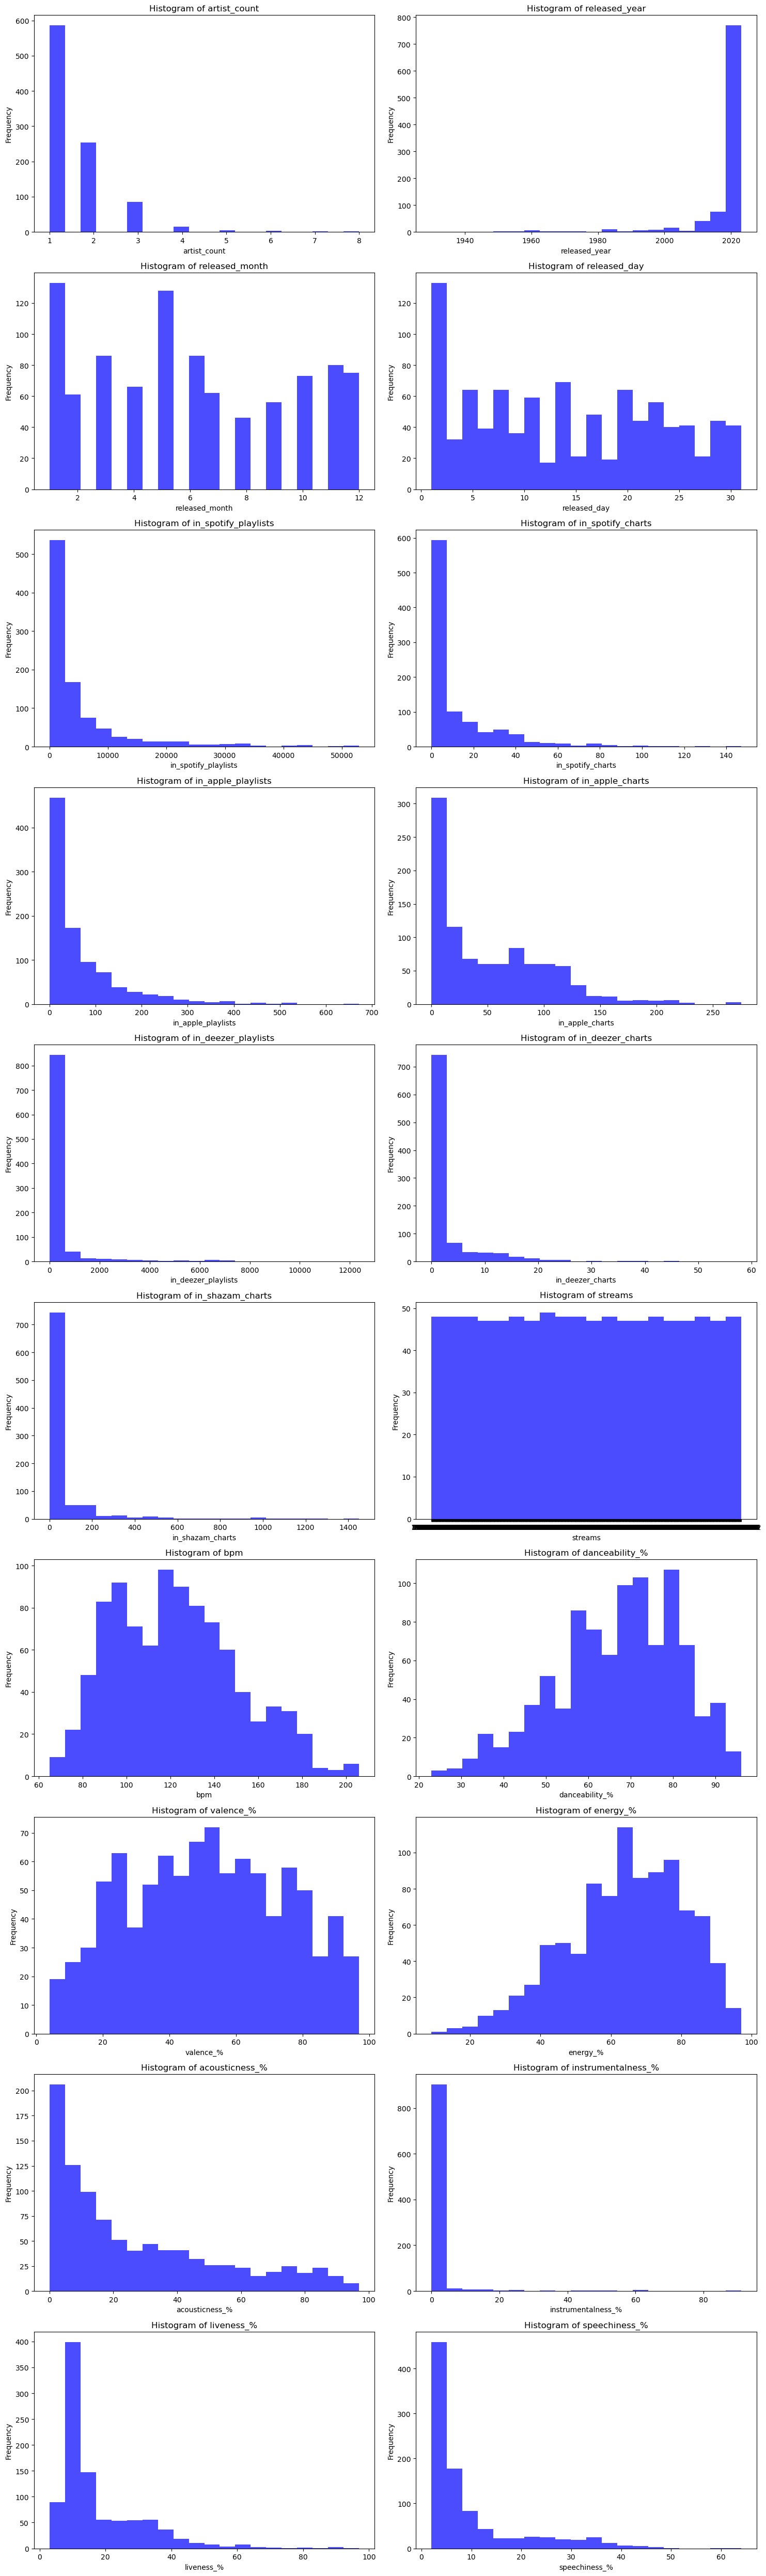

OK


In [17]:
# Define the list of features you want to plot histograms for
features_to_plot = [
    'artist_count',
    'released_year',
    'released_month',
    'released_day',
    'in_spotify_playlists',
    'in_spotify_charts',
    'in_apple_playlists',
    'in_apple_charts',
    'in_deezer_playlists',
    'in_deezer_charts',
    'in_shazam_charts',
    'streams',
    'bpm',
    'danceability_%',
    'valence_%',
    'energy_%',
    'acousticness_%',
    'instrumentalness_%',
    'liveness_%',
    'speechiness_%'
]

# Set the number of bins for the histograms
num_bins = 20

# Set the number of subplots per row
subplots_per_row = 2

# Calculate the number of rows needed
num_rows = len(features_to_plot) // subplots_per_row + (len(features_to_plot) % subplots_per_row > 0)

# Create subplots for the histograms with the specified layout
fig, axes = plt.subplots(nrows=num_rows, ncols=subplots_per_row, figsize=(15, 5 * num_rows))

# Flatten the 2D array of subplots into a 1D array
axes_flat = axes.flatten()

# Plot histograms for each feature
for i, feature in enumerate(features_to_plot):
    ax = axes_flat[i]
    ax.hist(df_copy[feature], bins=num_bins, color='blue', alpha=0.7)
    ax.set_title(f'Histogram of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')

# Hide any remaining empty subplots
for j in range(len(features_to_plot), num_rows * subplots_per_row):
    axes_flat[j].axis('off')

plt.tight_layout()
plt.show()
print("OK")


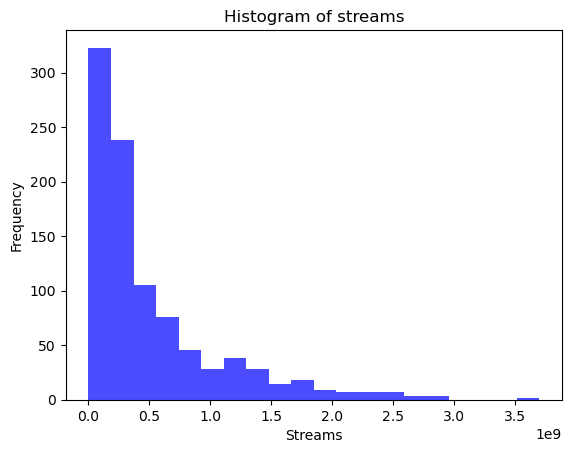

In [18]:
# Remove commas and convert to numeric
df_copy['streams'] = pd.to_numeric(df_copy['streams'].str.replace(',', ''), errors='coerce')
# Plot histogram for 'streams' column
plt.hist(df_copy['streams'], bins=num_bins, color='blue', alpha=0.7)
plt.title('Histogram of streams')
plt.xlabel('Streams')
plt.ylabel('Frequency')
plt.show()

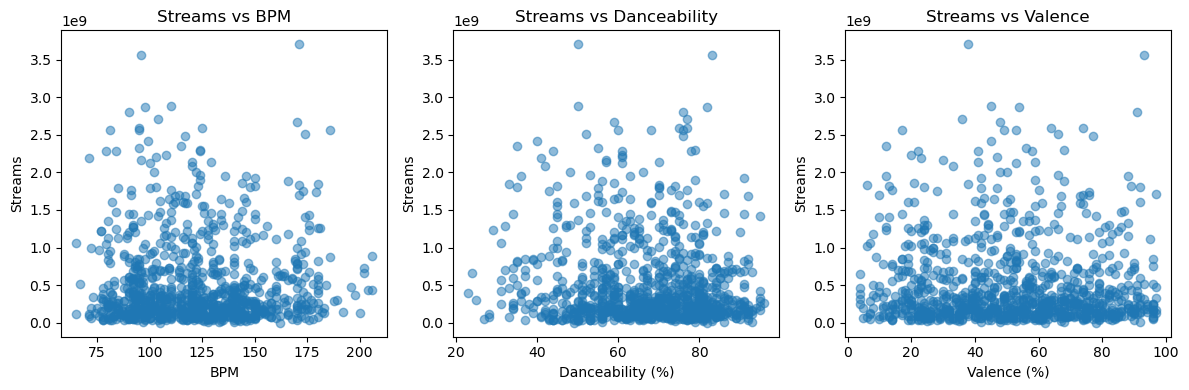

Correlation between 'streams' and 'bpm': -0.0024379081382717954
Correlation between 'streams' and 'danceability_%': -0.10545688369141913
Correlation between 'streams' and 'valence_%': -0.040831367495159455


In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Scatter plot for 'streams' and 'bpm'
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(df_copy['bpm'], df_copy['streams'], alpha=0.5)
plt.title('Streams vs BPM')
plt.xlabel('BPM')
plt.ylabel('Streams')

# Scatter plot for 'streams' and 'danceability_%'
plt.subplot(1, 3, 2)
plt.scatter(df_copy['danceability_%'], df_copy['streams'], alpha=0.5)
plt.title('Streams vs Danceability')
plt.xlabel('Danceability (%)')
plt.ylabel('Streams')

# Scatter plot for 'streams' and 'valence_%'
plt.subplot(1, 3, 3)
plt.scatter(df_copy['valence_%'], df_copy['streams'], alpha=0.5)
plt.title('Streams vs Valence')
plt.xlabel('Valence (%)')
plt.ylabel('Streams')

plt.tight_layout()
plt.show()

# Calculate correlation coefficients
correlation_bpm = np.corrcoef(df_copy['bpm'], df_copy['streams'])[0, 1]
correlation_danceability = np.corrcoef(df_copy['danceability_%'], df_copy['streams'])[0, 1]
correlation_valence = np.corrcoef(df_copy['valence_%'], df_copy['streams'])[0, 1]
correlation_bpm_dancaebility = np.corrcoef(df_copy['bpm'], df_copy['danceability_%'])[0, 1]


print(f"Correlation between 'streams' and 'bpm': {correlation_bpm}")
print(f"Correlation between 'streams' and 'danceability_%': {correlation_danceability}")
print(f"Correlation between 'streams' and 'valence_%': {correlation_valence}")

In [20]:
# Selecting only numeric columns
numeric_columns = df_copy.select_dtypes(include=['number']).columns

# Create a copy with only numeric columns
df_numeric = df_copy[numeric_columns].copy()

# Calculating the correlation for coefficients with 'streams'
correlation_with_streams = df_numeric.corr()['streams'].abs()

# Sort the features based on correlation coefficients in descending order
sorted_correlations = correlation_with_streams.sort_values(ascending=False)

# Display the sorted correlation coefficients
print(sorted_correlations)


streams                1.00
in_spotify_playlists   0.79
in_apple_playlists     0.77
in_deezer_playlists    0.60
in_apple_charts        0.32
in_spotify_charts      0.25
released_year          0.23
in_deezer_charts       0.23
artist_count           0.14
speechiness_%          0.11
danceability_%         0.11
liveness_%             0.05
instrumentalness_%     0.04
valence_%              0.04
energy_%               0.03
in_shazam_charts       0.02
released_month         0.02
released_day           0.01
acousticness_%         0.00
bpm                    0.00
Name: streams, dtype: float64


We’ve had a small look at the dataset and tried to clean it up a bit by checking for missing values and data types of each column.

We identified som incorrect data types in ‘streams’, ‘in_deezer_playlists’, and ‘in_shazam_charts’. Converted ‘streams’ to numeric, and for ‘in_deezer_playlists’ and ‘in_shazam_charts’, removed commas and converted to numeric.

we identified a NaN value in the ‘streams’ column at index 574. Dropped the row with index 574 as the missing ‘streams’ value didn’t contribute meaningfully.

We cleaned the ‘in_deezer_playlists’ and ‘in_shazam_charts’ columns by removing commas and converting to numeric and checked the data types after conversion.
Displayed descriptive statistics for the dataset.

We plotted histograms for all the number valued features to analyze the distributio.
We discoverd that the streams Histogram looked to have and incorrect values why we tried removing commas and converted ‘streams’ to numeric for better representation, which seemed to help 

Our first assumption was to find a correlation between number of streams with Bpm, 
Danceability and Valence and found, that the correlation more or less was equal to 
zero, so there is no linear relationship between the values why might have to see if
 there is a nonlinear relationship instead.
 
We then made a list of the correlations between all values to see if there was any and found a linear relationship between the playlists and streams.